In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

In [3]:
import pandas as pd
file = pd.read_csv('C:\\Users\\kuzni\\PycharmProjects\\pythonProject1\\files\\1normalized.csv', encoding="utf-8-sig")
data = file

In [29]:
#train/test split

# Assuming `result_df` is your DataFrame containing all the features and the "label" column
X = data.drop(columns=['label', 'text','duration', 'newest_message', 'oldest_message','owner_Id','owner_id'])  # Select all columns except "label"
y = data['label']  # Select only the "label" column

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=111)
print(y)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    0.0
Name: label, dtype: float64


In [34]:
#import sklearn packages for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
#initialize multiple classification models
mnb = MultinomialNB(alpha=0.2)

In [40]:

# Convert the DataFrames to NumPy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Create the SVC classifier
svc_classifier = SVC()

# Train the classifier on the training data
svc_classifier.fit(X_train_array, y_train)

# Perform predictions on the test data
y_pred = svc_classifier.predict(X_test_array)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


C:\Users\kuzni\PycharmProjects\pythonProject1\venv\ens\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


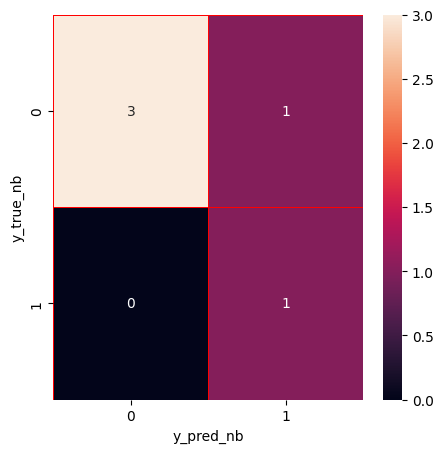

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# mnb.fit(X_train_array, y_train)

y_pred_nb = svc_classifier.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

In [49]:
#write functions to detect if the message is spam or not
def find(x):
    if x == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
newtext = ["Free entry"]
integers = vectorizer.fit_transform(newtext)

In [52]:
x = svc_classifier.predict(integers)
find(x)

ValueError: X has 2 features, but SVC is expecting 2060 features as input.